# <span style='color:Red'>Polynomial Regression</span> 
***
  * ### Polynomial regression is a type of regression analysis used in statistics and machine learning when the relationship between the independent variable (input) and the dependent variable (output) is not linear.
  * ### While simple linear regression models the relationship as a straight line, polynomial regression allows for more flexibility by fitting a polynomial equation to the data.
  * ### When the relationship between the variables is better represented by a curve rather than a straight line, polynomial regression can capture the non-linear patterns in the data.
  * ### The general form of a polynomial regression equation of degree $n$ is:
$$
\Large y=\theta_0\ +\ \theta_1\ *\ x_1\ +\ \theta_2\ *\ x_1^2\ +\ \theta_3\ *\ x_1^3\ + ..... + \ \theta_n\ *\ x_1^n\ 
$$
&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; where is the target variable, $x_1$ is the only feature of input dataset, $[\theta_0,\ \theta_1,\ .....\ \theta_n]$ are the paramters. 
 * ### By including higher-degree terms (quadratic, cubic, etc.), the model can capture the non-linear patterns in the data.
<br>
<br>
  


 * ## <span style='color:Blue'>Implementation on python:</span>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Create a synthetic dataset where the input X is uniformly distributed samples between 0 and 1. The output $y$ is the sine of input $X$ added with a gaussian noise, meeting the relationship $y=sin(2\pi x) + added\ gaussian\ noise$

In [ ]:
x = np.random.uniform(0,1,20)
N = np.random.normal(loc=0.0, scale=1.0, size=20)
y=np.sin(2*np.pi*x)+(0.1 * N)

In [ ]:
def split_dataset(n, val_percent):
    n_val = int(n*val_percent)
    idxs = np.random.permutation(n)
    return idxs[n_val:], idxs[:n_val]
train_set, val_set = split_dataset(len(x), 0.5)
train_x = []
train_y = []
test_x = []
test_y = []
for i in train_set:
    train_x.append(x[i])
    train_y.append(y[i])
for i in val_set:
    test_x.append(x[i])
    test_y.append(y[i])

In [ ]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

In [ ]:
np.random.seed(1)
def polynomial_fitFunction(deg = 1, train1 = train_x, train2 = train_y):
    model = np.polyfit(train1,train2,deg)
    return model

In [ ]:
def plot_polyfit(deg = 1, train1 = train_x, train2 = train_y, test1 = test_x, test2 = test_y):
    coeff = polynomial_fitFunction(deg, train1, train2)
    p = np.poly1d(coeff)
    plt.scatter(train1,train2,label="Training set")
    plt.scatter(test1,test2,label="Test set")
    curve_x = np.arange(min(x),max(x),0.01)
    plt.plot(curve_x,p(curve_x),label="Polynomial of degree {}".format(deg))
    plt.xlim((0,1))
    plt.ylim((-1,np.max(y)+1.0))
    plt.legend()
    plt.show()
    return coeff

In [ ]:
model_0 = plot_polyfit(0)
model_1 = plot_polyfit(1)
model_3 = plot_polyfit(3)
model_9 = plot_polyfit(9)

### From the above diagram, we can quite clearly notice that as we go higher in the degree, the model tries to fit in every point in the training dataset. 
### By doing this, the model is making extreme assumptions and will cause trouble in correctly predicting the data as we check later. 
### This phenomenon is called __overfitting__ and is a very fundamental obstacle in achieving the best performance in testing data.

In [ ]:
def mse(t1, t2):
    diff = t1-t2
    return np.sum(diff*diff)/np.size(diff)
train_rms = []
test_rms = []
for i in range(10):
    predict= np.poly1d(polynomial_fitFunction(i))
    train_rms.append(np.sqrt(mse(train_y, predict(train_x))))
    test_rms.append(np.sqrt(mse(test_y, predict(test_x))))

In [ ]:

plt.plot(train_rms,label="Training error")
plt.plot(test_rms,label="Test error")
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.legend()
plt.xlim((0,10))
plt.ylim((0,2))
plt.show()

The above plot shows the means square error (MSE) for the dataset on every degree from 0 to 9. 
This shows that the 9th degree had a huge increase in error value for the test data. This is because the model over learnt the training data, which is called over-fitting.

# <span style='color:Red'>Bias and Variance in machine learning</span> 
***

* ## Let {($\mathbf{X}_1$,$\mathbf{y}_1$), ($\mathbf{X}_2$,$\mathbf{y}_2$), ($\mathbf{X}_3$,$\mathbf{y}_3$) ..... ($\mathbf{X}_M$,$\mathbf{y}_M$)} are the M pairs of datasets sampled from a population.
* ## The shape of $m^{th}$ input data matrix $\mathbf{X}_m$ is $\in \mathbb{R}^{N\mathrm{x}D}$, and the shape of $m^{th}$ target data vector $\mathbf{y}_m$ is $\in \mathbb{R}^{N\mathrm{x}1}$. Here, $N$ is the number of instances, and $D$ is the number of features.
* ## Let '$f$' be the ACTUAL phenomenon that generated the target $\mathbf{y}_m$ for the input $\mathbf{X}_m$, linking them mathematically as
  $$
  \Large f(\mathbf{X}_m)=\mathbf{y}_m;\ \forall m={1,2,...M} \tag 1
  $$
  <br>
* ## Let '$g$' be the estimator of '$f$'.
* ## Let '$g_1$' be the model learnt on ($\mathbf{X}_1$,$\mathbf{y}_1$). Similarly, '$g_2$' be the model learnt on ($\mathbf{X}_2$,$\mathbf{y}_2$); '$g_3$' be the model learnt on ($\mathbf{X}_3$,$\mathbf{y}_3$); ........, and'$g_M$' be the model learnt on ($\mathbf{X}_M$,$\mathbf{y}_M$).
* ##  This implies
  $$\Large g_m(\mathbf{X_m})=\mathbf{\hat{y}_m};\ \forall m={1,2,...M}\tag 2$$.
<br>
* ## The estimator '$g$' can be a Random variable whose sample space involves the models {$g_1$,$g_2$,......$g_M$} learned on different datasets ($\mathbf{X}_1$,$\mathbf{y}_1$), ($\mathbf{X}_2$,$\mathbf{y}_2$), ($\mathbf{X}_3$,$\mathbf{y}_3$) ..... ($\mathbf{X}_M$,$\mathbf{y}_M$), respectively, picked from the population.
  <br>
* ## The expectation of '$g$', i.e., $E[g]$ is the mean of {$g_1(X_1)$,$g_2(X_2)$,......$g_M(X_M)$}.
* ## Mathematically, $E[g]=\frac{g_1(X_1)+g_2(X_2)+......+g_M(X_M)}{M}$
  <br>
* ## For the $m^{th}$ dataset pair ($\mathbf{X_m}$,$\mathbf{y_m}$), $m \in \{1,2,.....M\}$, the ordinary least squares linear regression estimates the estimator '$g_m$' based on the minimization of $E[\{\mathbf{y}_m-\mathbf{\hat{y}}_m\}^2]$, which can be restructured as $E[\{f(\mathbf{X}_m)-g_m(\mathbf{X}_m)\}^2]$ [from Equation (1) & (2)]
    * ### Note: To simplify the notation '$g_m(\mathbf{X}_m)$' is referred to as just '$g_m$', and '$f(\mathbf{X}_m)$' is referred to as '$f$' hereonwards.
<br>

* ## The least squares problem $E[\{\mathbf{y}_m-\mathbf{\hat{y}}_m\}^2]$ = $E[\{f-g_m\}^2]$ can further be simplified as:
  $
  \begin{align*}
      \Large E[\{f-g_m\}^2] &= \Large E[\{g_m-f-E[g]+E[g]\}^2] \\
      &= \Large E[(g_m- E[g])^2 + (E[g]-f)^2+2 (E[g]-f)(g-E[g])] \\
      &= \Large E[(g_m- E[g])^2] + E[(E[g]-f)^2]+2 E[(E[g]-f)(g-E[g])]] \\
      &= \Large E[(g_m- E[g])^2] + (E[g]-f)^2 + 2 (E[g]-f) E[(g-E[g])]\\
      &= \Large E[(g_m- E[g])^2] + (E[g]-f)^2 + 2 (E[g]-f) (E[g]-E[g])] \\ 
      &= \Large E[(g_m- E[g])^2] + (E[g]-f)^2 + 0
  \end{align*}
  $

    * ### Note: Here $E[g]$ is a constant and it implies $(E[g]-f)$ too a constant. From the fact that the expectation of any constant is constant,  $E[(E[g]-f)]$ is $E[g]-f$.
<br>

* ## In summary, the objective function of least squares regression can be written as
   $$
  \Large E[\{\mathbf{y}_m-\mathbf{\hat{y}}_m\}^2]= E[\{f(\mathbf{X}_m)-g_m(\mathbf{X}_m)\}^2]= \Large E[(g_m- E[g])^2] + (E[g]-f)^2
  $$
  * ### Where, the first term $E[(g_m- E[g])^2]$ is the "VARIANCE", and the second term $(E[g]-f)^2$ is the "BIAS".


* ## <span style='color:Blue'>Bias:
    * ### 'Bias' in machine learning refers to the error that accounts for the difference between average prediction model from the true model.
      $$\Large (E[g]-f)^2$$
      &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;    <img src="images/Bias1.png" width="600" height="300">
* ## <span style='color:Blue'>Variance:
    * ### 'Variance' in machine learning refers to the error that accounts for the spread or dispersion of predicted models learned on different samples of datasets (of the same population) with respect to the average prediction model.
    * ### Alternatively,  it is the variability of model prediction on different datasets. The variance shows how much model prediction varies when there is a slight variation in data.
      $$\Large E[(g_m- E[g])^2]$$
      &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;   <img src="images/Variance1.png" width="600" height="300">
* ## <span style='color:Blue'>Bias-Variance trade off:
    * ### The minimization of the least squares objective function $\Large E[\{\mathbf{y}_m-\mathbf{\hat{y}}_m\}^2]= \Large E[(g_m- E[g])^2] + (E[g]-f)^2 $ involves the minimization of both the bias and variance.
    * ### Below are the four scenarios of Bias and variance
      &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;      <img src="images/Bias_variance5.png" width="600" height="300">
      <br>
      <br>
      &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;      <img src="images/Bias_variance4.png" width="600" height="300">
      <br>
      <br>
      &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;      <img src="images/Bias_variance3.png" width="600" height="300">
     <br>
     <br>
      &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;<img src="images/Bias_variance2.png" width="600" height="300">
      
      
    * ### Ideally, both the Bias and Variance are expected to be LOW.     

    * ### <span style='color:Blue'>Example: <span style='color:Black'>(Ref: Page 78 of [[*1*]](https://erp.metbhujbalknowledgecity.ac.in/StudyMaterial/01VM092015008350131.pdf) )
        * #### The figure below shows the context of polynomial regression.
        * #### Part (a) of it shows the phenomenon $f$ on which the data has been generated. The plot of $f$ indicates that the phenomenon here is the sinusoidal function '$2 \sin (1.5x)$'.
        * #### Additionally, it shows a randomly picked dataset of 20 instances meeting the phenomenon $f$. However, due to the noisy sensing environment, the picked instances are not perfectly on the sinusoidal curve.
    * &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;      <img src="images/Bias_variance1.png" width="600" height="300">
        * #### Part (b) of the figure shows five computational models $\{g_1, g_2, g_3, g_4, g_5\}$ learned, respectively, on five different datasets. All these datasets have been picked following the same way as that of the dataset picked in Part (a).
        * #### It can be observed in part (b) that, all the five learned models are straight lines. It is due to the polynomial of order 1.
        * #### The dashed line in part (b) is the average of the five straight lines ($E[g]$).
        * #### The difference between the plot $f$ of part (a) and the dashed line ($E[g]$) of part (b) shows a HIGH BIAS during the polynomial fit of order 1.
        * #### As the order of the polynomial increases, the complexity of the model increases, and the small changes in the dataset cause a greater change in the fitted polynomials; thus, variance increases.
        * #### In part (d) of the figure, the spread of the five learned models with respect to the average model (dashed plot) is showing high, which indicates a HIGH VARIANCE.
        * #### The difference between the plot $f$ of part (a) and the dashed line ($E[g]$) of part (d) shows that the bias decreases as the order of polynomial increases.
        * #### It indicates that, a complex model on the average allows a better fit to the underlying function; thus bias decreases.
    * ### The below figure shows the variation of bias-variance as the order of the polynomial regression increases (or model complexity increases):
    * &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;   <img src="images/Bias_Variance6.png" width="600" height="300">
        * #### When the order of polynomial (or the complexity of the model) is low, the model fails to fit the data, leaving a significant difference between the fitted model and the true model. This results in a HIGH BIAS.
        * #### However, as the order of the polynomial (or the complexity of the model) increases, the fitting model approaches the true model, resulting in reduced bias.

        * #### On the other hand, increasing the polynomial order (or the complexity of the model), results in increasing the variance because at higher order polynomials the small changes in the dataset cause a greater change in the fitted polynomials
        * #### The optimal model is the one that has the best trade-off between the bias and the variance
       <br>
    * ### To summarize:
        * #### Increasing model complexity reduces bias but increases variance (risk of overfitting).
        * #### Simplifying the model reduces variance but increases bias (risk of underfitting).
        * #### The goal is to find an optimal balance where both bias and variance are minimized, resulting in good generalization performance.

# <span style='color:Red'>Overfitting and Underfitting in machine learning</span> 
***
 * ### Machine learning models aim to perform well on both training data and new, unseen data and is considered “good” if:
    * #### 1. It learns patterns effectively from the training data.
    * #### 2. It generalizes well to new, unseen data.
    * #### 3. It avoids memorizing the training data (overfitting) or failing to capture relevant patterns (underfitting).
      <br>
 * ## <span style='color:Blue'> Overfitting:
     * #### Overfitting happens when a model learns too much from the training data, including details that don’t matter (like noise or outliers).
     * #### For example, imagine fitting a very complicated curve to a set of points. The curve will go through every point, but it won’t represent the actual pattern. As a result, the model works great on training data but fails when tested on new data.
     * #### Overfitting models are like students who memorize answers instead of understanding the topic. They do well in practice tests (training) but struggle in real exams (testing).
       <br>
     * ### Reasons for Overfitting:
        * #### High variance and low bias.
        * #### The model is too complex.
        * #### The size of the training data.
          <br>
* ## <span style='color:Blue'> Underfitting:
     * #### Underfitting is the opposite of overfitting. It happens when a model is too simple to capture what’s going on in the data.
     * #### For example, imagine drawing a straight line to fit points that actually follow a curve. The line misses most of the pattern. In this case, the model doesn’t work well on either the training or testing data.
     * #### Underfitting models are like students who don’t study enough. They don’t do well in practice tests or real exams.
       <br>
     * ### Reasons for Underfitting:
        * #### The model is too simple, So it may be not capable to represent the complexities in the data.
        * #### The input features which is used to train the model is not the adequate representations of underlying factors influencing the target variable.
        * #### The size of the training dataset used is not enough.
        * #### Excessive regularization are used to prevent the overfitting, which constraint the model to capture the data well.
        * #### Features are not scaled.

   &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;   &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; <img src="images/Overfitting_Underfitting.png" width="600" height="300">
    * ### Underfitting : Straight line trying to fit a curved dataset but cannot capture the data’s patterns, leading to poor performance on both training and test sets.
    * ### Overfitting: A squiggly curve passing through all training points, failing to generalize performing well on training data but poorly on test data.
    * ### Appropriate Fitting: Curve that follows the data trend without overcomplicating to capture the true patterns in the data.
  <br>
* ### Techniques to Reduce Underfitting:
    * #### Increase model complexity.
    * #### Increase the number of features, performing feature engineering.
    * #### Remove noise from the data.
    * #### Increase the number of epochs or increase the duration of training to get better results.
* ### Techniques to Reduce Overfitting:
    * #### Improving the quality of training data reduces overfitting by focusing on meaningful patterns, mitigate the risk of fitting the noise or irrelevant features.
    * #### Increase the training data can improve the model’s ability to generalize to unseen data and reduce the likelihood of overfitting. Reduce model complexity.
    * #### Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training).
    * #### Use Regularization technique.

# <span style='color:Red'>Regularization in machine learning</span> 
***
  * ### Regularization restricts a model to prevent overfitting by penalizing large coefficient values, with some techniques shrinking coefficients to zero.
  * ### When a model suffers from overfitting, we should control the model's complexity.
  * ### Technically, regularization avoids overfitting by adding a penalty to the model's loss function:
    $$
    \Large Regularization\ =\ Loss\ function\ +\ Penalty
    $$
  * ### There are three commonly used regularization techniques to control the complexity of machine learning models:
      * #### L2 regularization
      * #### L1 regularization
      * #### Elastic Net
 * ## <span style='color:Blue'> L2-Regularization:
     * #### A linear regression model that uses the L2 regularization technique is called ridge regression.
     * #### Effectively, it adds a penalty term to the cost function, which reduces the magnitude of the model's weights (coefficients) without setting them to zero.
     * #### This encourages the model to distribute influence more evenly across features, helping prevent overfitting while maintaining as much predictive power as possible.
       $$
       \Large Ridge\ Regression\ cost\ function\ = \sum_{t=1}^{N} \{y^t-\hat{y}^t\}^2 +\ \frac{1}{2}\lambda \sum_{j=1}^{D+1}\theta_j^2 
       $$

     * #### Here, $\lambda$ controls the strength of regularization, and $\theta_j$ are the model's weights (coefficients).
     * #### Increasing $\lambda$ applies stronger regularization, shrinking coefficients further, which can reduce overfitting but may lead to underfitting if $\lambda$ is too large.
     * #### Conversely, when $\lambda$ is close to $0$, the regularization term has little effect, and ridge regression behaves like ordinary linear regression.
     * #### Ridge regression helps strike a balance between bias and variance, improving the model's ability to generalize to unseen data by controlling the influence of less important features.
       <br>
 * ## <span style='color:Blue'> L1-Regularization:
     * #### Least Absolute Shrinkage and Selection Operator (lasso) regression is an alternative to ridge regression for regularizing linear models.  
     * #### It adds a penalty term to the cost function, known as L1 regularization, which encourages sparsity by shrinking some coefficients to exactly zero.
     * #### This effectively ignores the least important features, emphasizing the model's most significant predictors.

        $$
       \Large Lasso\ Regression\ cost\ function\ = \sum_{t=1}^{N} \{y^t-\hat{y}^t\}^2 +\ \lambda \sum_{j=1}^{D+1} |\theta_j| 
       $$

     * #### Here, $\lambda$ controls the strength of regularization, with larger values penalizing coefficients more, and $\theta_j$ are the model's weights (coefficients).
     * #### By eliminating less important features, lasso regression performs automatic feature selection, simplifying the model and improving interpretability.
  * ## <span style='color:Blue'> Elastic Net:
      * #### The Elastic Net is a regularized regression technique combining ridge and lasso's regularization terms.
      * #### The parameter $r$ controls the combination ratio. When $r=1$, the L2 term will be eliminated, and when $r=0$, the L1 term will be removed.
     $$
       \Large Elastic\ Net\ cost\ function\ = \sum_{t=1}^{N} \{y^t-\hat{y}^t\}^2 +\ \lambda\ (r\ \sum_{j=1}^{D+1} |\theta_j| + \frac{(1-r)}{2} \sum_{j=1}^{D+1}\theta_j^2\ ) 
       $$
      * #### Although combining the penalties of lasso and ridge usually works better than only using one of the regularization techniques, adjusting two parameters, $\lambda$ and $r$, is a little tricky.
        <br>
        <br>

* ### The ridge regression can be thought of as solving an equation, where summation of squares of coefficients is less than or equal to some value, for example, $s$.
* ### And the Lasso can be thought of as an equation where summation of modulus of coefficients is less than or equal to $s$.
* ### Here, $s$ is a constant that exists for each value of shrinkage factor $λ$. These equations are also referred to as constraint functions.
  <br>
* ### Consider the case of only 2 parameters, $\begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}$ in a given problem.
* ### Then according to the Lasso regression formulation, the penalty is expressed by $|\theta_0|\ +\ |\theta_1|\le s$.
* ### This implies that the Lasso regression must find the smallest value of loss function from the points that lie within the diamond given by $|\theta_0|\ +\ |\theta_1|\le s$
  <br>
* ### Similariy, In the ridge regression, the penalty is expressed by $\theta_0^2\ +\ \theta_1^2 \le s$.
* ### This implies that the ridge regression must find the smallest value of loss function from the points that lie within the circle given by $\theta_0^2\ +\ \theta_1^2 \le s$.

 &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;   &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; <img src="images/Regularization1.png" width="600" height="300">
 <br>
* ### The above image shows the constraint functions(green areas), for lasso(left) and ridge regression(right), along with contours for the loss function (red ellipse).
* ### Points on the ellipse share the value of loss. The center dot is the minimum, and the loss increases as the function goes away from the dot.
* ### For a very large value of s, the green regions can be large, and the center of the ellipse (minimum of loss function) can be within it.
* ### This enables both regression techniques to estimate the parameters that belong to the least loss.
* ### However, when we keep constraint in the size of s (as in the above image), the minimum of the loss function may not be within the green region.
* ### In these cases, the regression techniques consider the optimum points as those where the loss function contours(red ellipses) meet the constraint(green) region for the first time.
  <br>
* ### It can be observed that the constraint region of ridge regression is circular with no sharp points, this results the intersection of loss function contours will not generally occur on an axis.
* ### Therefore, the parameters estimated by the ridge regression will be exclusively non-zeros.
* ### Whereas, in lasso regression, the constraint region is diamond shape with sharp points on the axes, therefore, the loss function contours often interset the constraint region at an axis.
* ### When this occurs, one of the coeﬃcients will equal zero. In higher dimensions(where parameters are much more than 2), many of the coeﬃcient estimates may equal zero simultaneously.
  <br>
* ### This shows that, in the case of the lasso, the L1 penalty has the eﬀect of forcing some of the coeﬃcient estimates to be exactly equal to zero when the tuning parameter λ is suﬃciently large.
* ### Therefore, the lasso method also performs variable selection and is said to yield sparse models.

### Python Implementation of Regularization:

In [2]:
# Import all necessary libraries
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import operator
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
input_df = read_csv(url, header=None)

data = input_df.values

Xregu = data[20:30, 12] # choose one feature
yregu = data[20:30, 13] # target
Xregu_train, Xregu_test, yregu_train, yregu_test = train_test_split(Xregu,yregu,test_size=0.3,random_state=23)

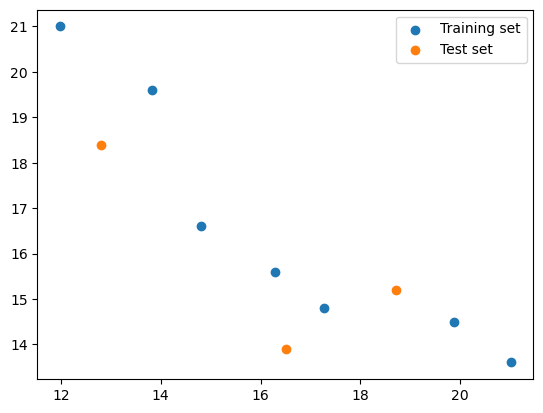

In [3]:
plt.scatter(Xregu_train,yregu_train,label="Training set")
plt.scatter(Xregu_test,yregu_test,label="Test set")
plt.legend()
plt.show()

In [4]:
# reshape
Xregu_train_re = Xregu_train[:, np.newaxis]
yregu_train_re = yregu_train[:, np.newaxis]
Xregu_test_re = Xregu_test[:, np.newaxis]
yregu_test_re = yregu_test[:, np.newaxis]

In [5]:
# Fitting polynomial regression model of degree=deg
def plot_polyfit(reg,deg,X_data,y_data):
    # polynomial transformation
    polynomial_features= PolynomialFeatures(degree=deg)
    X_poly = polynomial_features.fit_transform(X_data)
    reg.fit(X_poly, y_data)
    return reg

def predict(reg,X_data,deg):
    polynomial_features= PolynomialFeatures(degree=deg)
    X_poly = polynomial_features.fit_transform(X_data)
    y_poly_pred = reg.predict(X_poly)
    return y_poly_pred

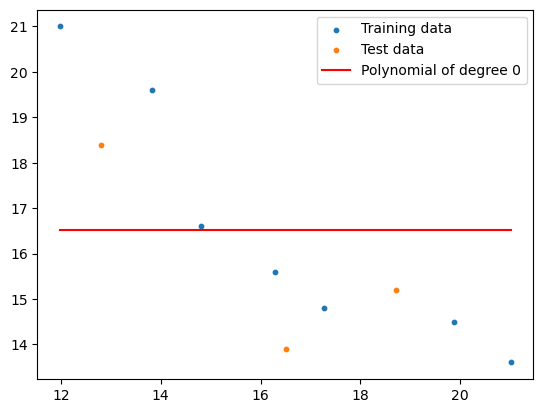

Error on training data: 2.562763177127535
Error on test data: 2.014674059153452


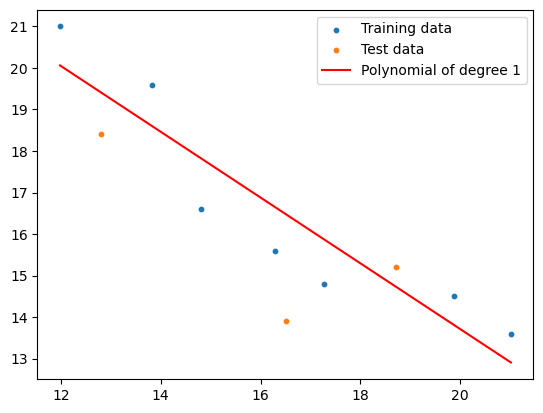

Error on training data: 0.9681657174644879
Error on test data: 1.6209249106961476


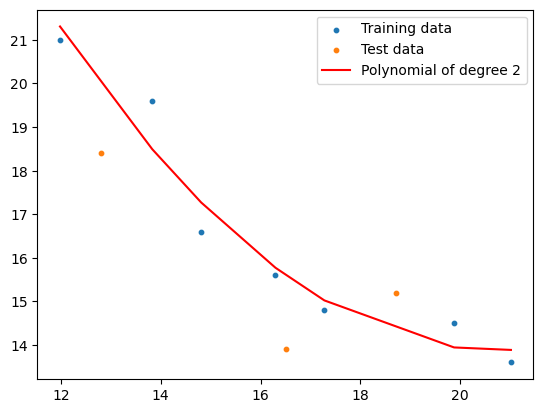

Error on training data: 0.566128907018583
Error on test data: 1.4425989042873408


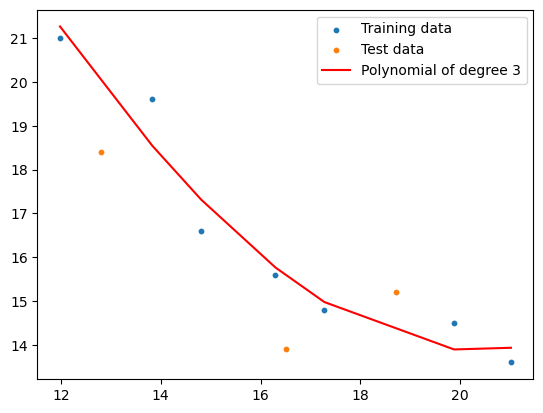

Error on training data: 0.5644533869899803
Error on test data: 1.4609879945670214


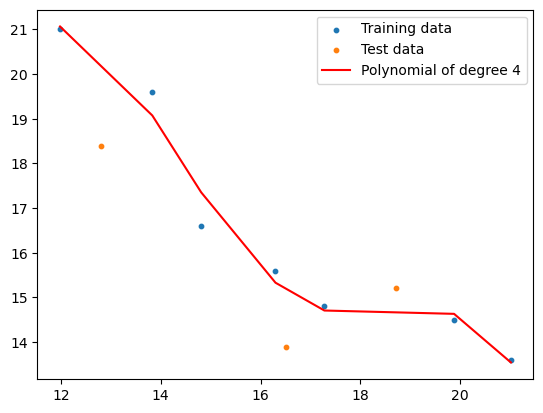

Error on training data: 0.3685525187839791
Error on test data: 1.49666298816143


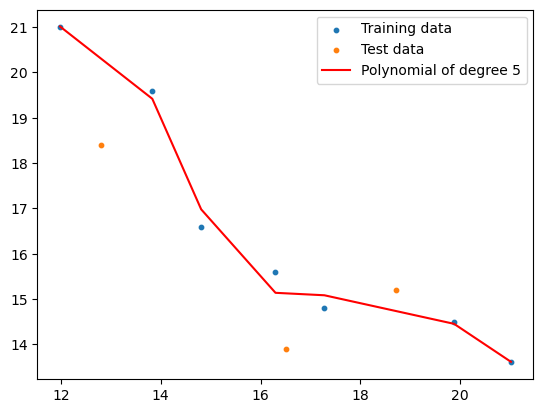

Error on training data: 0.26008495165403683
Error on test data: 1.9782974455132902


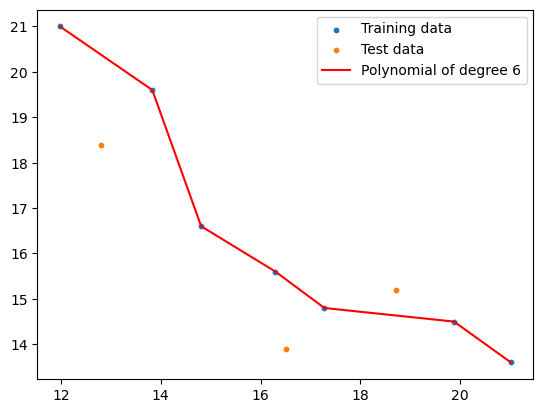

Error on training data: 0.0001177917775427082
Error on test data: 3.496651006853562


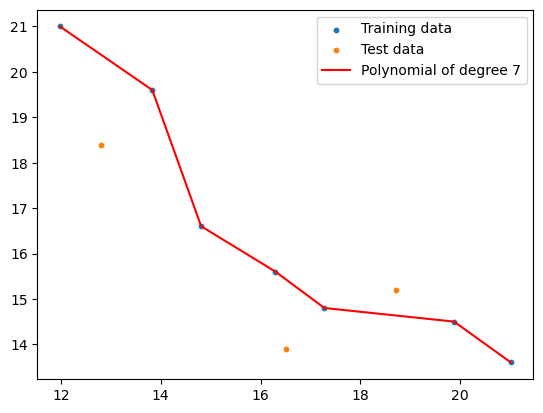

Error on training data: 2.606001781864087e-08
Error on test data: 3.369962218550238


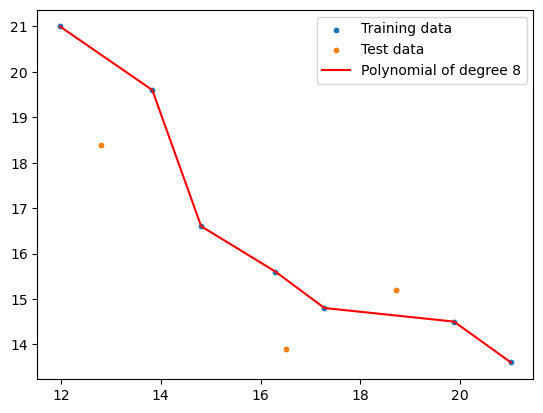

Error on training data: 2.3770022778926252e-09
Error on test data: 3.292235247750071


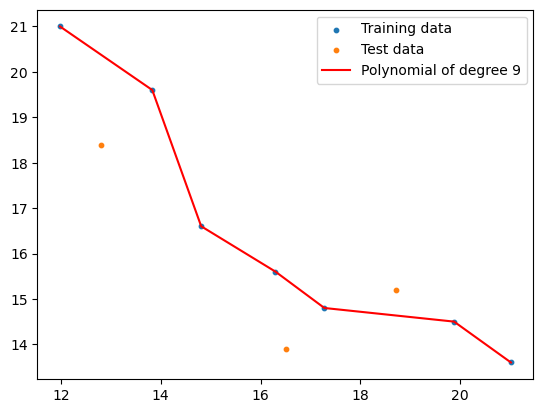

Error on training data: 2.9797513254385143e-09
Error on test data: 3.272729086150734


In [6]:
# Polynomial regression without regularization
train_rms=[]
test_rms=[]
for i in range(10):
    lin_reg = LinearRegression()
    reg_trained= plot_polyfit(lin_reg,i,Xregu_train_re,yregu_train_re)
    predict_train=predict(reg_trained,Xregu_train_re,i)
    train_rms.append(np.sqrt(mean_squared_error(yregu_train_re, predict_train)))
    
    predict_test= predict(reg_trained,Xregu_test_re,i)
    test_rms.append(np.sqrt(mean_squared_error(yregu_test_re, predict_test)))
   
    # Plot fit over data:
    plt.scatter(Xregu_train_re, yregu_train_re, s=10,label="Training data")
    plt.scatter(Xregu_test_re, yregu_test_re, s=10,label="Test data")
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(Xregu_train_re, predict_train), key=sort_axis)
    Xregu_train_sort, yregu_train_poly_pred_sort = zip(*sorted_zip)
    plt.plot(Xregu_train_sort, yregu_train_poly_pred_sort, color='r',label="Polynomial of degree {}".format(i))
    plt.legend()
    plt.show()
    print("Error on training data:",train_rms[i])
    print("Error on test data:",test_rms[i])

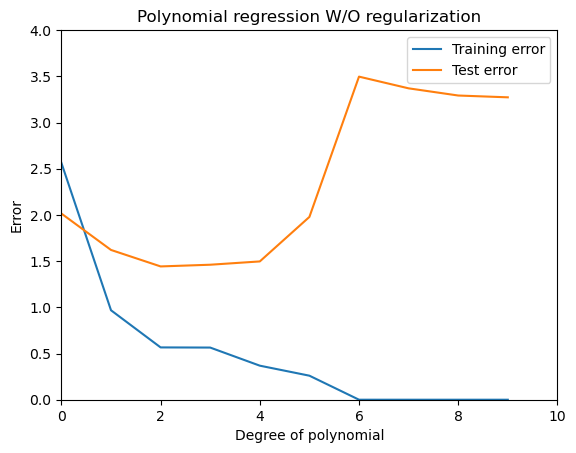

In [7]:
# Plotting the training and testing error of polynomial regression
plt.plot(train_rms,label="Training error")
plt.plot(test_rms,label="Test error")
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.title('Polynomial regression W/O regularization')
plt.legend()
plt.xlim((0,10))
plt.ylim((0,4))
plt.show()

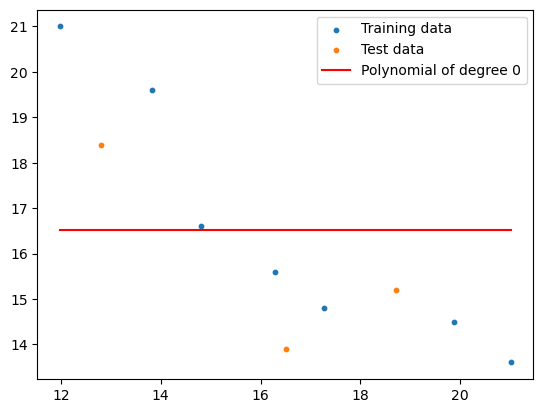

Error on training data: 2.562763177127535
Error on test data: 2.014674059153452


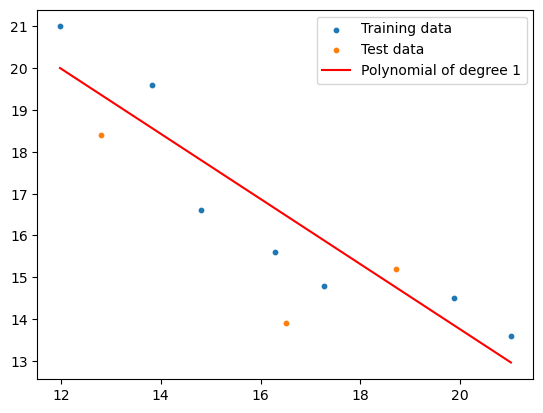

Error on training data: 0.9688776795094982
Error on test data: 1.6094713489527646


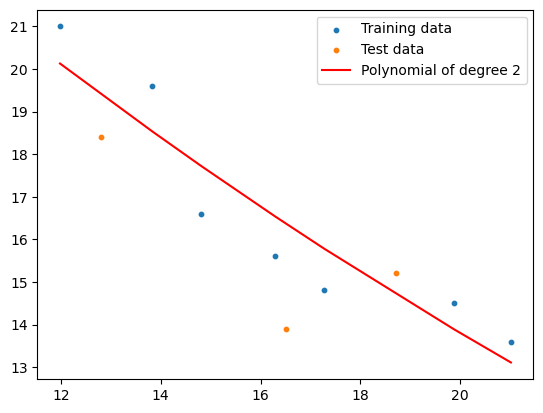

Error on training data: 0.8943306414718055
Error on test data: 1.56691163686038


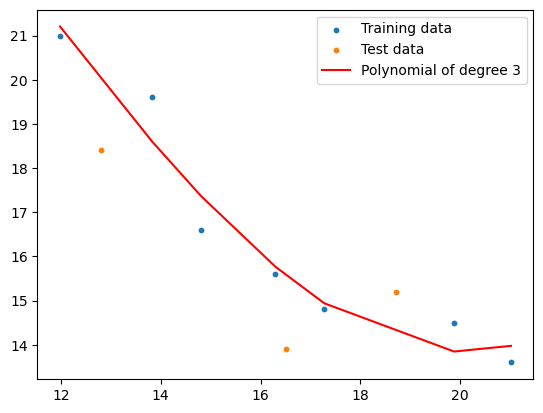

Error on training data: 0.5662643583154988
Error on test data: 1.4807276902277562


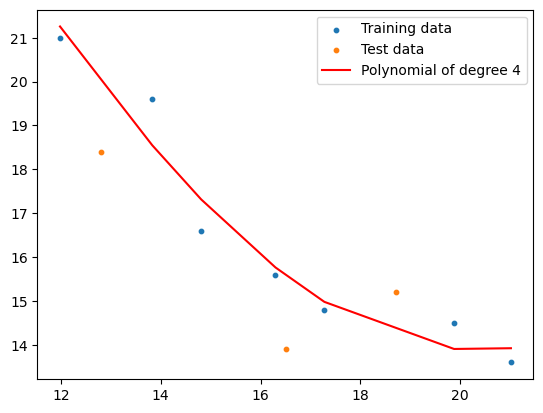

Error on training data: 0.5605840163182801
Error on test data: 1.4594165614286763


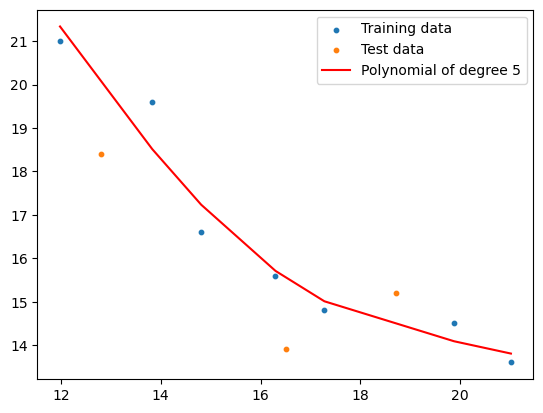

Error on training data: 0.5298471376741182
Error on test data: 1.4201777733793848


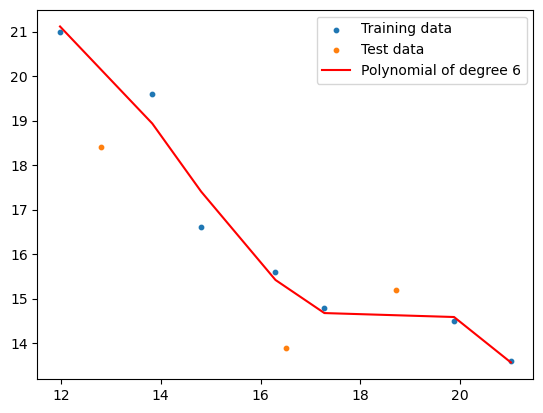

Error on training data: 0.4071344249084249
Error on test data: 1.4171150650329793


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


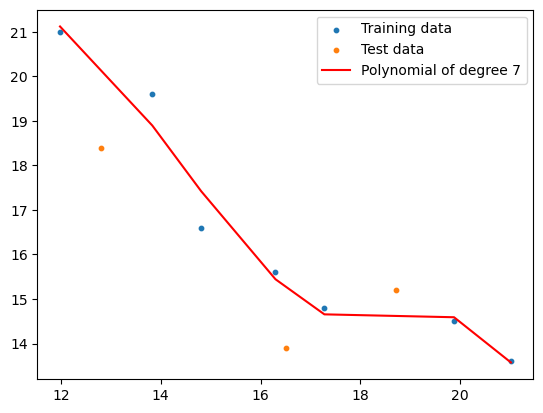

Error on training data: 0.420515906732694
Error on test data: 1.4010022397711948


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


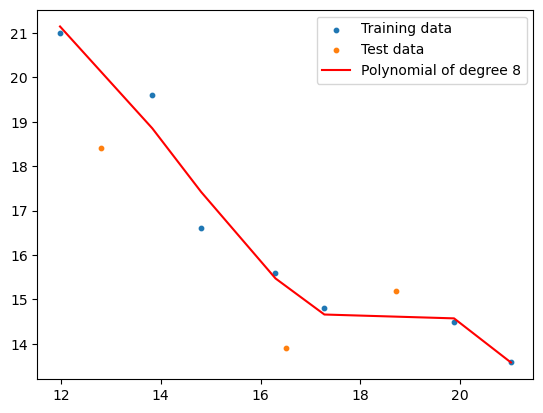

Error on training data: 0.42973345883498715
Error on test data: 1.395834865836336


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


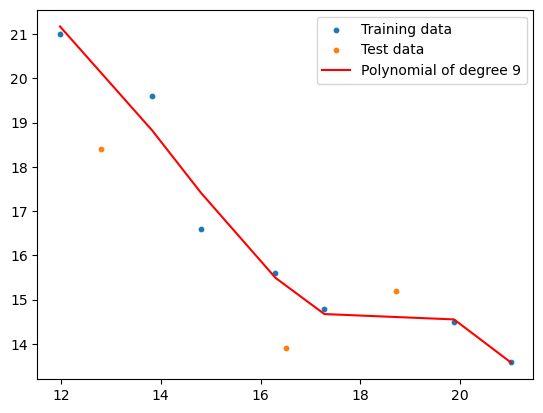

Error on training data: 0.4345677822956101
Error on test data: 1.3966034940272332


In [8]:
from sklearn.linear_model import Ridge

# Polynomial regression with Ridge regularization 
Ridge_train_rms=[]
Ridge_test_rms=[]
for i in range(10):
    ridge_reg = Ridge(alpha=1)
    reg_trained= plot_polyfit(ridge_reg,i,Xregu_train_re,yregu_train_re)
    predict_train=predict(reg_trained,Xregu_train_re,i)
    Ridge_train_rms.append(np.sqrt(mean_squared_error(yregu_train_re, predict_train)))
    
    predict_test= predict(reg_trained,Xregu_test_re,i)
    Ridge_test_rms.append(np.sqrt(mean_squared_error(yregu_test_re, predict_test)))
   
    # Plot fit over data:
    plt.scatter(Xregu_train_re, yregu_train_re, s=10,label="Training data")
    plt.scatter(Xregu_test_re, yregu_test_re, s=10,label="Test data")
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(Xregu_train_re, predict_train), key=sort_axis)
    Xregu_train_sort, yregu_train_poly_pred_sort = zip(*sorted_zip)
    plt.plot(Xregu_train_sort, yregu_train_poly_pred_sort, color='r',label="Polynomial of degree {}".format(i))
    plt.legend()
    plt.show()
    print("Error on training data:",Ridge_train_rms[i])
    print("Error on test data:",Ridge_test_rms[i])


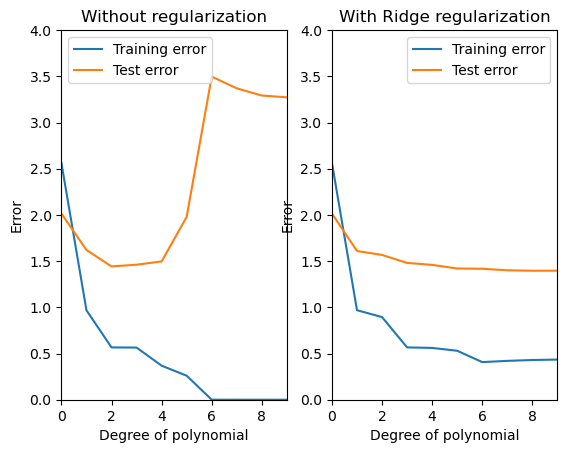

In [9]:
plt.subplot(1, 2, 1)
plt.plot(train_rms,label="Training error")
plt.plot(test_rms,label="Test error")
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.title("Without regularization")
plt.legend()
plt.xlim((0,9))
plt.ylim((0,4))

plt.subplot(1, 2, 2)
plt.plot(Ridge_train_rms,label="Training error")
plt.plot(Ridge_test_rms,label="Test error")
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.title("With Ridge regularization")
plt.legend()
plt.xlim((0,9))
plt.ylim((0,4))
plt.show()

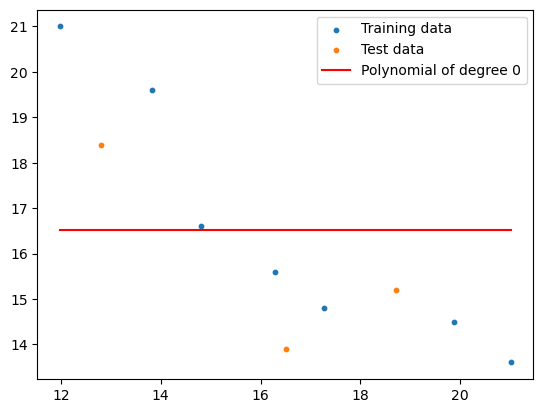

Error on training data: 2.562763177127535
Error on test data: 2.014674059153452


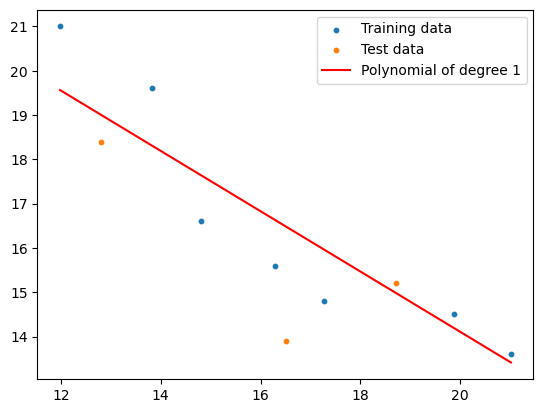

Error on training data: 1.0240313214988954
Error on test data: 1.5371245814069912


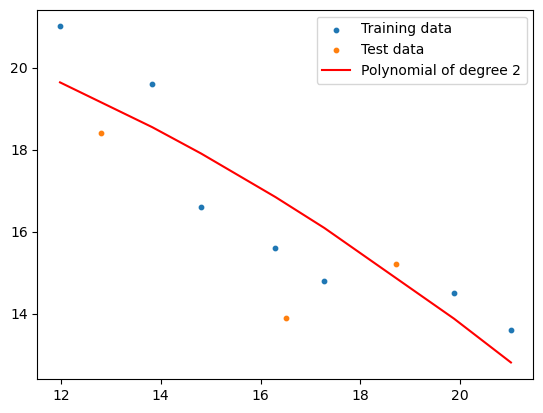

Error on training data: 1.1262576605737054
Error on test data: 1.6767269683987296


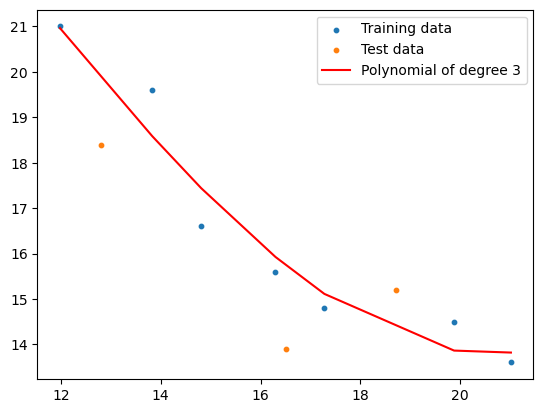

Error on training data: 0.5850189954376528
Error on test data: 1.470381849186459


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+00, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


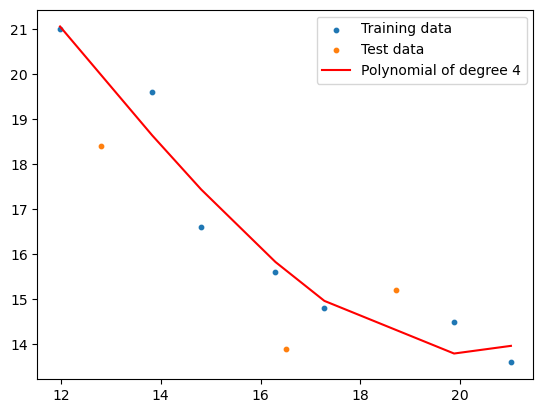

Error on training data: 0.5784983223285317
Error on test data: 1.494017280194185


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.567e+00, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


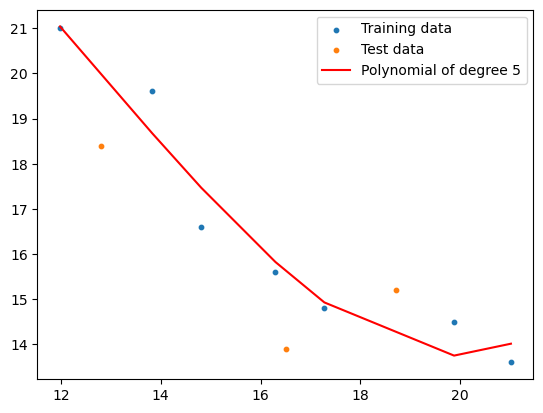

Error on training data: 0.5876950478430258
Error on test data: 1.5112392535586672


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.603e+00, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


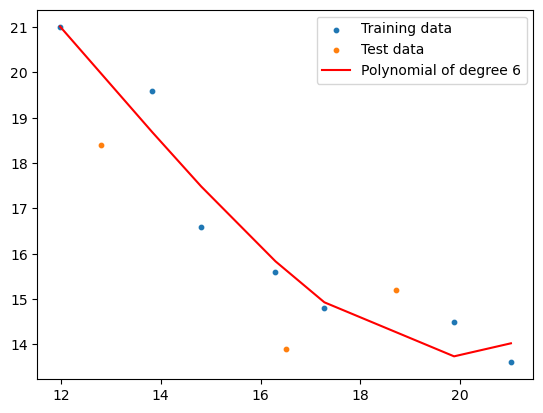

Error on training data: 0.5928003970265592
Error on test data: 1.5165887409500685


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.617e+00, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


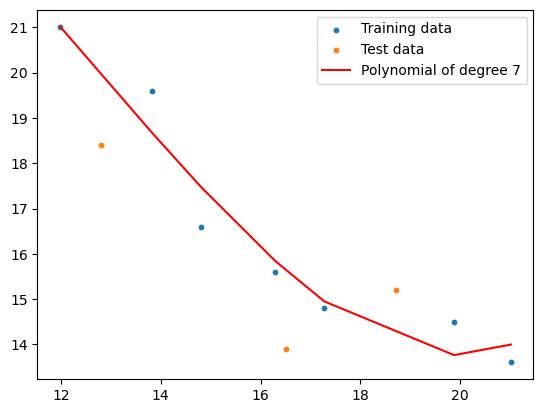

Error on training data: 0.5867355060080642
Error on test data: 1.5067457977734435


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.610e+00, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


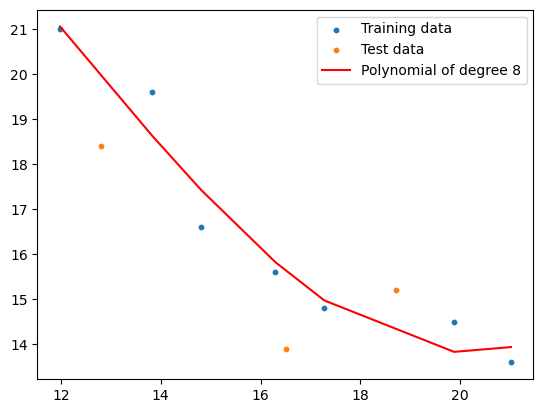

Error on training data: 0.5693768145159452
Error on test data: 1.484039618608642


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.580e+00, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


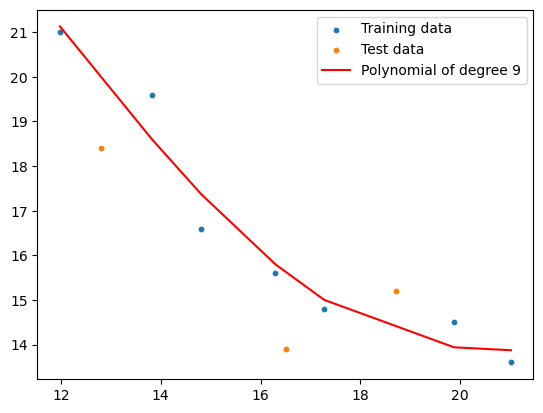

Error on training data: 0.547184596953999
Error on test data: 1.4557032651967972


In [10]:
from sklearn.linear_model import Lasso

# Polynomial regression with Lasso regularization 
Lasso_train_rms=[]
Lasso_test_rms=[]
for i in range(10):
    lasso_reg = Lasso(alpha=1)
    reg_trained= plot_polyfit(lasso_reg,i,Xregu_train_re,yregu_train_re)
    predict_train=predict(reg_trained,Xregu_train_re,i)
    Lasso_train_rms.append(np.sqrt(mean_squared_error(yregu_train_re, predict_train)))
    
    predict_test= predict(reg_trained,Xregu_test_re,i)
    Lasso_test_rms.append(np.sqrt(mean_squared_error(yregu_test_re, predict_test)))
   
    # Plot fit over data:
    plt.scatter(Xregu_train_re, yregu_train_re, s=10,label="Training data")
    plt.scatter(Xregu_test_re, yregu_test_re, s=10,label="Test data")
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(Xregu_train_re, predict_train), key=sort_axis)
    Xregu_train_sort, yregu_train_poly_pred_sort = zip(*sorted_zip)
    plt.plot(Xregu_train_sort, yregu_train_poly_pred_sort, color='r',label="Polynomial of degree {}".format(i))
    plt.legend()
    plt.show()
    print("Error on training data:",Lasso_train_rms[i])
    print("Error on test data:",Lasso_test_rms[i])

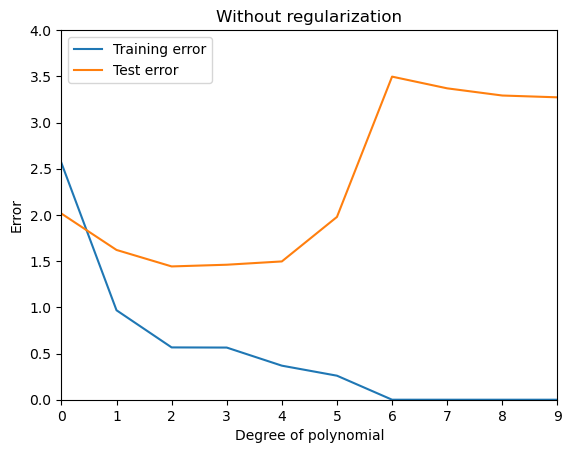

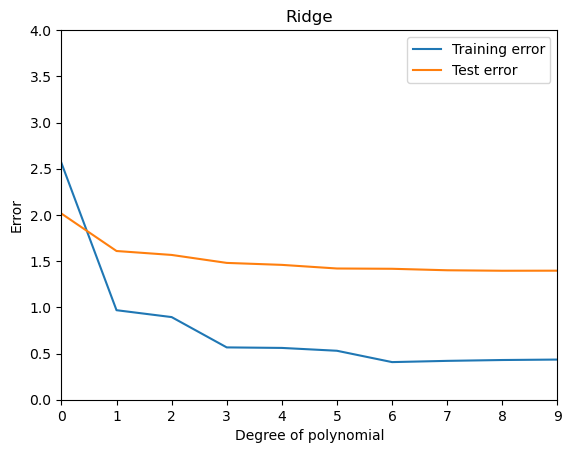

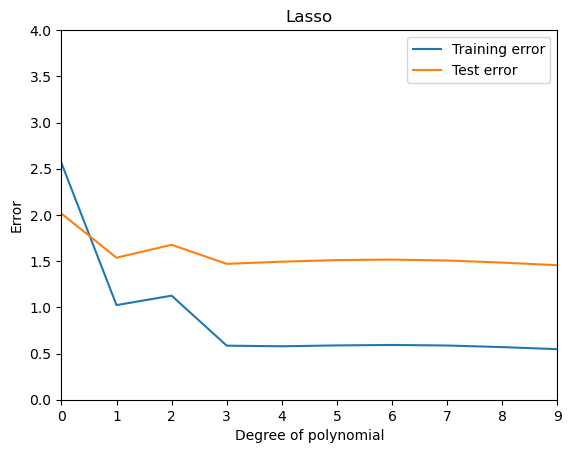

In [11]:

plt.plot(train_rms,label="Training error")
plt.plot(test_rms,label="Test error")
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.title("Without regularization")
plt.legend()
plt.xlim((0,9))
plt.ylim((0,4))
plt.show()

plt.plot(Ridge_train_rms,label="Training error")
plt.plot(Ridge_test_rms,label="Test error")
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.title("Ridge")
plt.legend()
plt.xlim((0,9))
plt.ylim((0,4))
plt.show()

plt.plot(Lasso_train_rms,label="Training error")
plt.plot(Lasso_test_rms,label="Test error")
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.title("Lasso")
plt.legend()
plt.xlim((0,9))
plt.ylim((0,4))
plt.show()

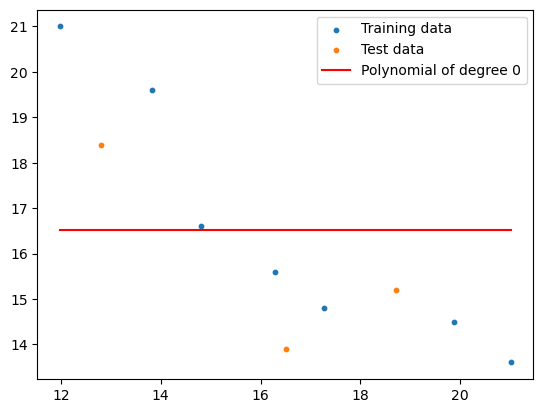

Error on training data: 2.562763177127535
Error on test data: 2.014674059153452


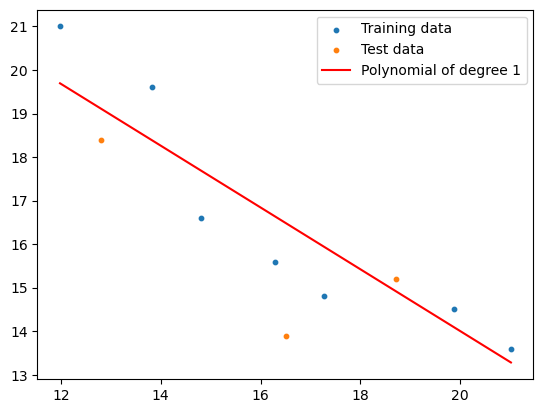

Error on training data: 0.9990190857769624
Error on test data: 1.55474857366736


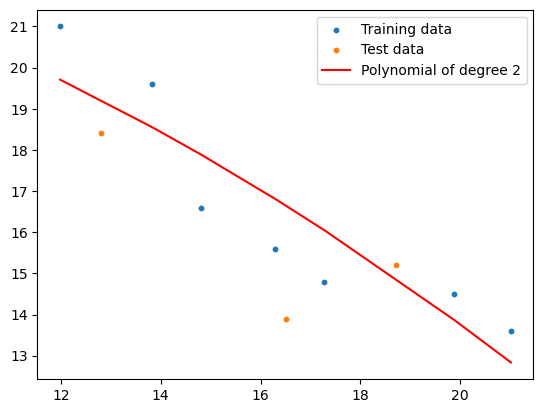

Error on training data: 1.096312348711363
Error on test data: 1.6635122347685067


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.110e-02, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


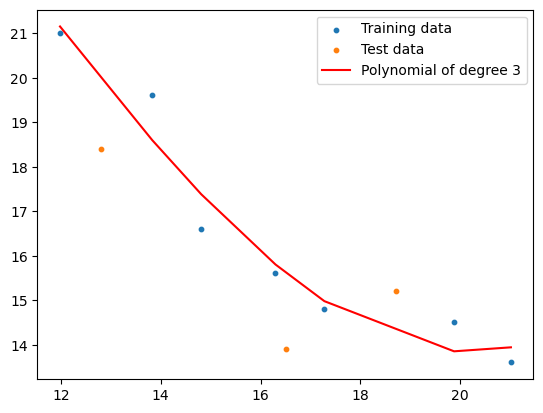

Error on training data: 0.5674221332027983
Error on test data: 1.4772673985641942


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.018e+00, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


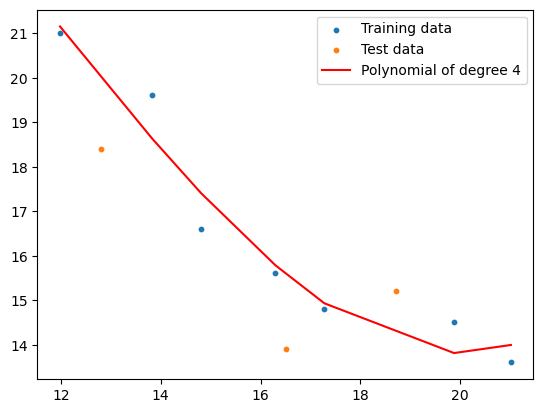

Error on training data: 0.5720478708896845
Error on test data: 1.4928390853513174


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.253e+00, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


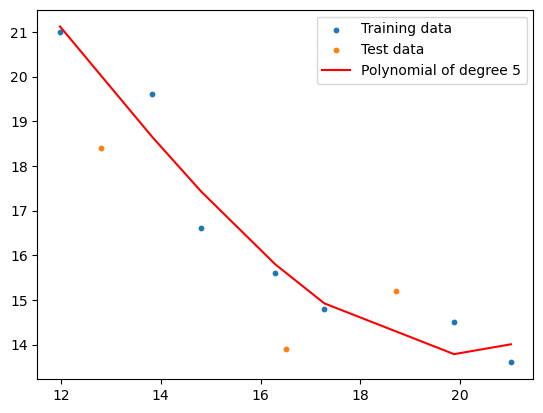

Error on training data: 0.577313078018419
Error on test data: 1.5013049917080916


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.263e+00, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


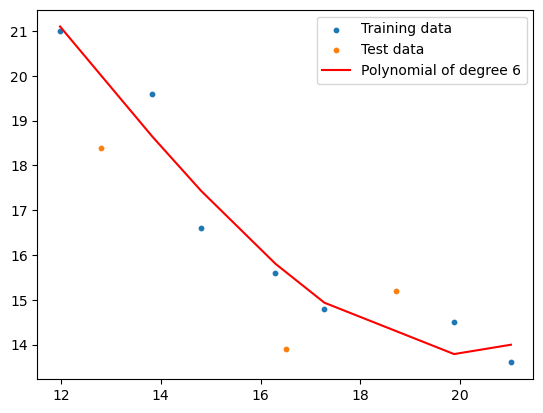

Error on training data: 0.577872864981286
Error on test data: 1.4999098740374186


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e+00, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


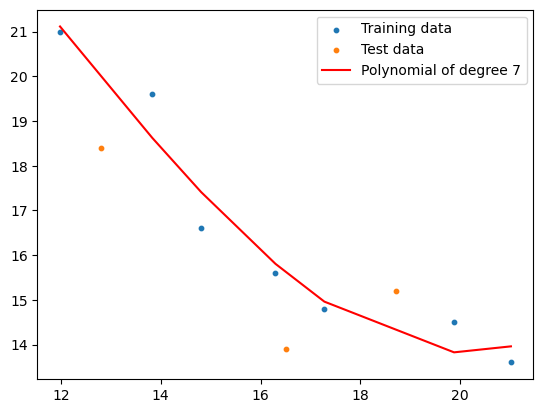

Error on training data: 0.570215416347321
Error on test data: 1.486647069114205


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+00, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


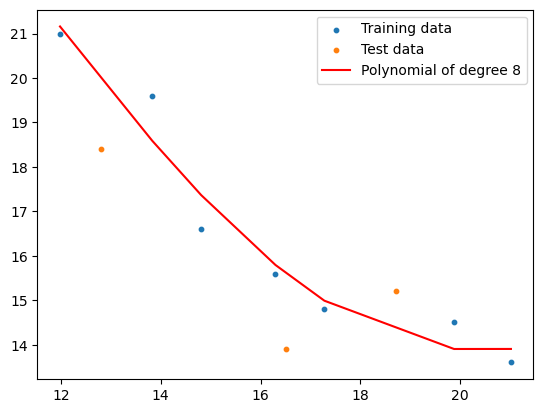

Error on training data: 0.555497019081432
Error on test data: 1.4639505084182858


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+00, tolerance: 4.597e-03
  model = cd_fast.enet_coordinate_descent(


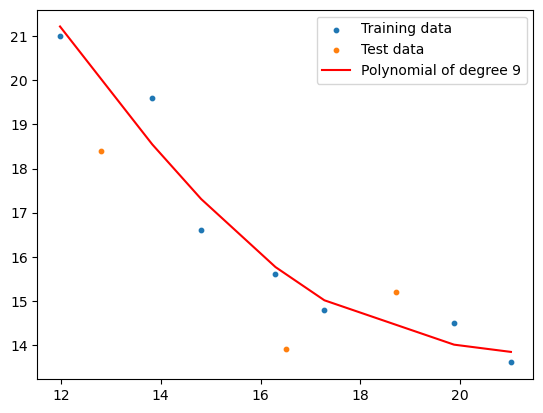

Error on training data: 0.5391195962502862
Error on test data: 1.4380425405087311


In [12]:
from sklearn.linear_model import ElasticNet

# Polynomial regression with Elastic net regularization 
Elastic_train_rms=[]
Elastic_test_rms=[]
predict_train=None
predict_test=None
for i in range(10):
    Elastic_net = ElasticNet(alpha=1, l1_ratio=0.1) # Lasso 10 : 90 Ridge
    reg_trained= plot_polyfit(Elastic_net,i,Xregu_train_re,yregu_train_re)
    predict_train=predict(reg_trained,Xregu_train_re,i)
    Elastic_train_rms.append(np.sqrt(mean_squared_error(yregu_train_re, predict_train)))
    
    predict_test= predict(reg_trained,Xregu_test_re,i)
    Elastic_test_rms.append(np.sqrt(mean_squared_error(yregu_test_re, predict_test)))
   
    # Plot fit over data:
    plt.scatter(Xregu_train_re, yregu_train_re, s=10,label="Training data")
    plt.scatter(Xregu_test_re, yregu_test_re, s=10,label="Test data")
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(Xregu_train_re, predict_train), key=sort_axis)
    Xregu_train_sort, yregu_train_poly_pred_sort = zip(*sorted_zip)
    plt.plot(Xregu_train_sort, yregu_train_poly_pred_sort, color='r',label="Polynomial of degree {}".format(i))
    plt.legend()
    plt.show()
    print("Error on training data:",Elastic_train_rms[i])
    print("Error on test data:",Elastic_test_rms[i])

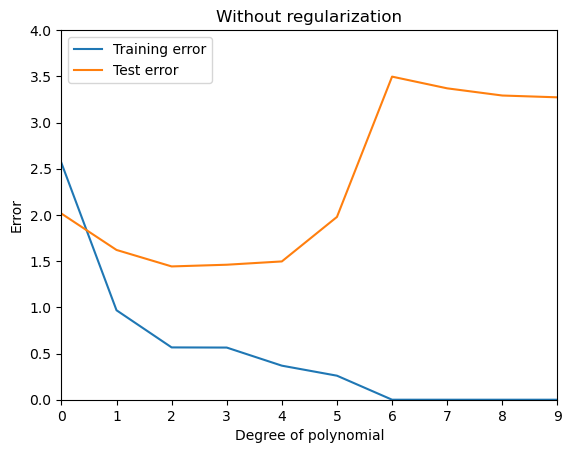

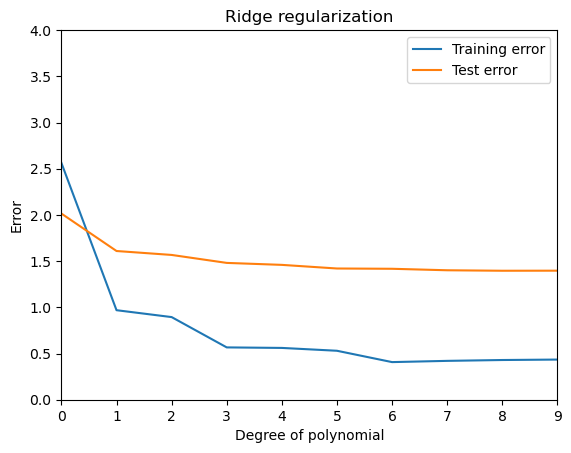

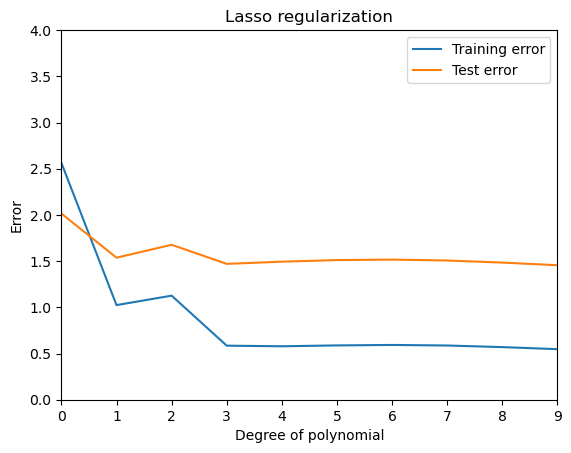

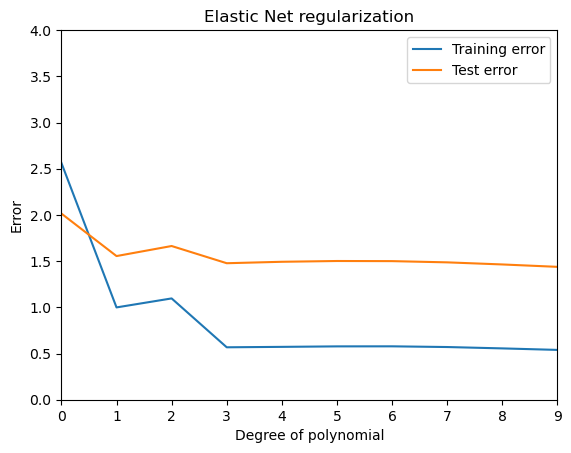

In [13]:
plt.plot(train_rms,label="Training error")
plt.plot(test_rms,label="Test error")
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.title("Without regularization")
plt.legend()
plt.xlim((0,9))
plt.ylim((0,4))
plt.show()

plt.plot(Ridge_train_rms,label="Training error")
plt.plot(Ridge_test_rms,label="Test error")
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.title("Ridge regularization")
plt.legend()
plt.xlim((0,9))
plt.ylim((0,4))
plt.show()

plt.plot(Lasso_train_rms,label="Training error")
plt.plot(Lasso_test_rms,label="Test error")
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.title("Lasso regularization")
plt.legend()
plt.xlim((0,9))
plt.ylim((0,4))
plt.show()

plt.plot(Elastic_train_rms,label="Training error")
plt.plot(Elastic_test_rms,label="Test error")
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.title("Elastic Net regularization")
plt.legend()
plt.xlim((0,9))
plt.ylim((0,4))
plt.show()